Reference List:
1. https://machinelearningmastery.com/how-to-model-human-activity-from-smartphone-data/
2. https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/
3. https://www.tensorflow.org/tutorials/structured_data/time_series#baseline

## Step 1: Import Libraries for Project

In [1]:
import pandas as pd
import numpy as np
import os
import csv
from math import log
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score

## Step 2: XN Project Dataset Overview

In [2]:
data = pd.read_csv('data_unit_82.csv')
data2 = pd.read_csv('data_unit_27.csv')
print("Lightning EMotors dataset has {} data points with {} variables each.".format(*data.shape)) 
data.shape
# data.describe()
data.head()

Lightning EMotors dataset has 6983 data points with 20 variables each.


,Unnamed: 0,Unnamed: 0.1,Altitude,Latitude,Longitude,RptTimestamp,Unnamed: 0.1.1,ambient_air_temperature_degc,battery_available_energy_wh,battery_state_of_charge_pct,fleet,hvbatt_max_cell_temp_c,hvbatt_min_cell_temp_c,m_vs,odometer_distance_m,unitID,mil_V,battery_regen_lifetime_wh,hvac_cycle_wh,vehicle_speed_kph
0,0,0,10,32.737369,-117.184051,1633562640,0.0,23.0,94394,92.5781,17_CA,NaN,NaN,534.0,454520,82,4066.0,61208,NaN,0.0
1,1,0,10,32.737369,-117.184051,1633562640,0.0,23.0,94394,92.5781,17_CA,NaN,NaN,534.0,454520,82,4066.0,61208,NaN,0.0
2,2,5786,10,32.737369,-117.184051,1633562640,5369.0,23.0,94394,92.5781,17_CA,NaN,NaN,534.0,454520,82,4066.0,61208,NaN,0.0
3,3,5786,10,32.737369,-117.184051,1633562640,5369.0,23.0,94394,92.5781,17_CA,NaN,NaN,534.0,454520,82,4066.0,61208,NaN,0.0
4,4,1,12,32.737392,-117.184029,1633562700,1.0,23.0,94394,92.5781,17_CA,NaN,NaN,534.0,454520,82,4066.0,61208,NaN,0.0


<AxesSubplot:>

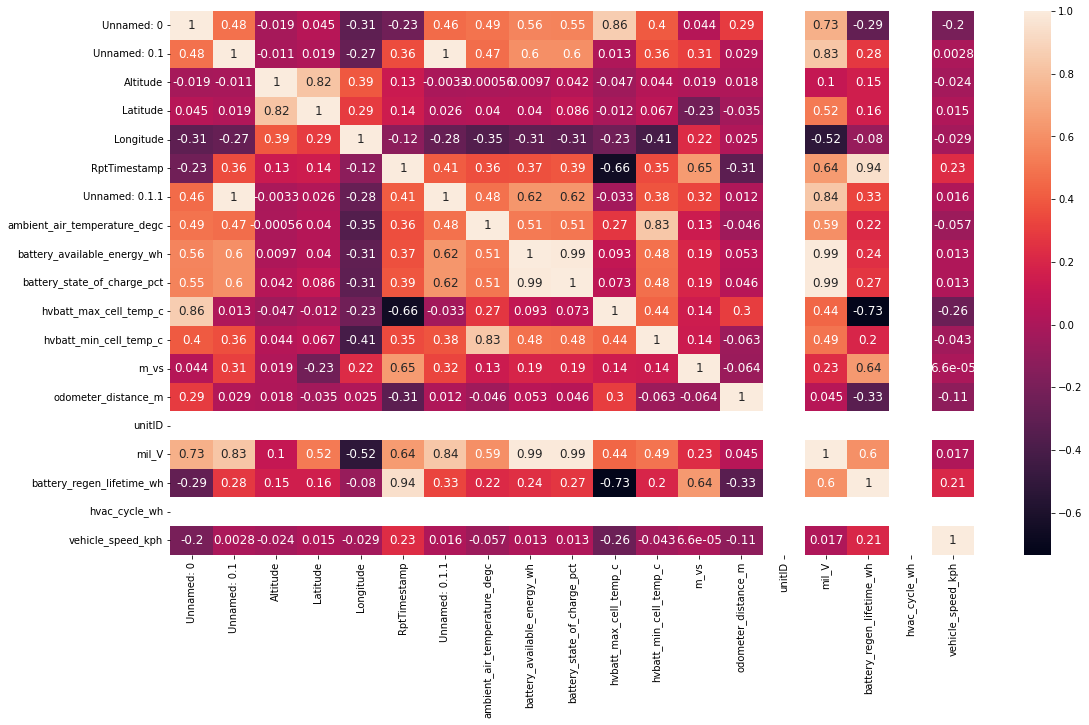

In [3]:
# Correlation
'''
We use heatmap to draw the map
annot set to showing each color value
'''
import seaborn as sns
import matplotlib.pyplot as plt
correlation = data.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(correlation, annot = True, annot_kws={'size': 12})

According to the heatmap, the RptTimestamp, battery_regen_lifetime_wh is highly related to the m_vs value. 

In [4]:
features = data[['RptTimestamp','battery_regen_lifetime_wh','mil_V','m_vs']]
features2 = data2[['RptTimestamp','battery_regen_lifetime_wh','mil_V','m_vs']]
features.info()
features.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RptTimestamp               6983 non-null   int64  
 1   battery_regen_lifetime_wh  6983 non-null   int64  
 2   mil_V                      5561 non-null   float64
 3   m_vs                       5561 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 218.3 KB


RptTimestamp                    0
battery_regen_lifetime_wh       0
mil_V                        1422
m_vs                         1422
dtype: int64

In [5]:
features = features.dropna()
features2 = features2.dropna()
features.info()
features.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5561 entries, 0 to 6982
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RptTimestamp               5561 non-null   int64  
 1   battery_regen_lifetime_wh  5561 non-null   int64  
 2   mil_V                      5561 non-null   float64
 3   m_vs                       5561 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 217.2 KB


RptTimestamp                 0
battery_regen_lifetime_wh    0
mil_V                        0
m_vs                         0
dtype: int64

In [6]:
# Innitial x and y value for dataset load
# target = features['m_vs']
features.m_vs = [1 if each >=450 else 0 for each in features.m_vs]
y = features['m_vs']
x_data = features.drop('m_vs', axis = 1)

## Step 3: XN Project Dataset Loading

In [7]:
# **The below decision tree algorithm is is referenced from YuFu's assignment of Course CS6140.**
# data cleaning
for csvfile in os.listdir(r"C:\Users\Alienware\7280code"):
    domain = os.path.abspath(r'C:\Users\Alienware\7280code')
    csvfile = os.path.join(domain,csvfile)
    data = pd.read_csv(csvfile)
    if 'm_vs'in data:
        features = data[['RptTimestamp','battery_regen_lifetime_wh','mil_V','m_vs']]
        features = features.dropna()
#         target = target.append(features.m_vs)
        features.m_vs = [1 if each >=450 else 0 for each in features.m_vs]
        y1 = features['m_vs']
        y = y.append(y1)
        x_data = x_data.append(features.drop('m_vs', axis = 1))
# Data normalization, Use the maximum and minimum values of the feature to scale 
# the value of the feature to the [0,1] interval, and use the min-max function for each column of features.
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
print(x.shape, y.shape)
# data.describe()
x.head()

(19885946, 3) (19885946,)


,RptTimestamp,battery_regen_lifetime_wh,mil_V
0,0.715226,0.002036,0.489715
1,0.715226,0.002036,0.489715
2,0.715226,0.002036,0.489715
3,0.715226,0.002036,0.489715
4,0.715227,0.002036,0.489715


In [9]:
# # target.shape
# target.describe()

In [27]:
# Move duplicated values
data = pd.concat([x,y],axis=1)
data = data.drop_duplicates()
x = data[['RptTimestamp','battery_regen_lifetime_wh','mil_V']]
y = data['m_vs']

## Step 4: Model Training

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
train_y_predict = dt_model.predict(x_train)
print("Decision Tree Model")
print("training accuracy: ", end=" ")
print(accuracy_score(y_train, train_y_predict))
print("training recall: ", end=" ")
print(recall_score(y_train, train_y_predict, average='macro'))
print("training precision: ", end=" ")
print(precision_score(y_train, train_y_predict, average='macro'))
print("training f1 score: ", end=" ")
print(f1_score(y_train, train_y_predict, average='macro'))
print("___________________________________________________________________________________")
test_y_predict = dt_model.predict(x_test)
print("test accuracy: ", end=" ")
print(accuracy_score(y_test, test_y_predict))
print("test recall: ", end=" ")
print(recall_score(y_test, test_y_predict, average='macro'))
print("test precision: ", end=" ")
print(precision_score(y_test, test_y_predict, average='macro'))
print("test f1 score: ", end=" ")
print(f1_score(y_test, test_y_predict, average='macro'))

Decision Tree Model
training accuracy:  1.0
training recall:  1.0
training precision:  1.0
training f1 score:  1.0
___________________________________________________________________________________
test accuracy:  0.9999292353742891
test recall:  0.9922529389624755
test precision:  0.9923715943810376
test f1 score:  0.9923122594888056


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=80, random_state=0)
rf_model.fit(x, y)
train_y_predict = rf_model.predict(x_train)
print("Random Forest Model")
print("training accuracy: ", end=" ")
print(accuracy_score(y_train, train_y_predict))
print("training recall: ", end=" ")
print(recall_score(y_train, train_y_predict, average='macro'))
print("training precision: ", end=" ")
print(precision_score(y_train, train_y_predict, average='macro'))
print("training f1 score: ", end=" ")
print(f1_score(y_train, train_y_predict, average='macro'))
print("___________________________________________________________________________________")
test_y_predict = rf_model.predict(x_test)
print("test accuracy: ", end=" ")
print(accuracy_score(y_test, test_y_predict))
print("test recall: ", end=" ")
print(recall_score(y_test, test_y_predict, average='macro'))
print("test precision: ", end=" ")
print(precision_score(y_test, test_y_predict, average='macro'))
print("test f1 score: ", end=" ")
print(f1_score(y_test, test_y_predict, average='macro'))

Random Forest Model
training accuracy:  0.999999582098667
training recall:  0.9999107036551971
training precision:  0.9999997905593364
training f1 score:  0.9999552431199701
___________________________________________________________________________________
test accuracy:  0.9999994427982227
test recall:  0.99987922705314
test precision:  0.9999997207551006
test f1 score:  0.9999394666101482


In [34]:
lr_clf = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
lr_clf.fit(x, y)
train_y_predict = lr_clf.predict(x_train)
print("Logistic Regression Model")
print("training accuracy: ", end=" ")
print(accuracy_score(y_train, train_y_predict))
print("training recall: ", end=" ")
print(recall_score(y_train, train_y_predict, average='macro'))
print("training precision: ", end=" ")
print(precision_score(y_train, train_y_predict, average='macro'))
print("training f1 score: ", end=" ")
print(f1_score(y_train, train_y_predict, average='macro'))
print("___________________________________________________________________________________")
test_y_predict = lr_clf.predict(x_test)
print("test accuracy: ", end=" ")
print(accuracy_score(y_test, test_y_predict))
print("test recall: ", end=" ")
print(recall_score(y_test, test_y_predict, average='macro'))
print("test precision: ", end=" ")
print(precision_score(y_test, test_y_predict, average='macro'))
print("test f1 score: ", end=" ")
print(f1_score(y_test, test_y_predict, average='macro'))

Logistic Regression Model
training accuracy:  0.997678140194196
training recall:  0.5038695082747946
training precision:  0.9988390490733706
training f1 score:  0.507098433970863
___________________________________________________________________________________
test accuracy:  0.9977149155114945
test recall:  0.5047101449275362
test precision:  0.9988574329267714
test f1 score:  0.5087604391535338


In [27]:
## The code below for Debug Use only
# data3 = pd.read_csv('data_unit_92.csv')
# features3 = data3[['RptTimestamp','battery_regen_lifetime_wh','mil_V','m_vs']]
# features3 = features3.dropna()
# features3.m_vs = [1 if each >=450 else 0 for each in features3.m_vs]
# y3 = features3['m_vs']
# x_data3 = features3.drop('m_vs', axis = 1)
# # Data normalization, Use the maximum and minimum values of the feature to scale 
# # the value of the feature to the [0,1] interval, and use the min-max function for each column of features.
# x3 = (x_data3 -np.min(x_data3))/(np.max(x_data3)-np.min(x_data3)).values
# predict_results3 = dt_model.predict(x3)
# scores3 = dt_model.score(x3, y3)

# print (accuracy_score(predict_results3, y3))

0.8645408291773714
